# **BREAST CANCER DISEASE PREDICTION**

### **Importing the Dependencies**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from scipy.stats import randint
import pickle

### **Data Collection and Processing**

In [8]:
# Load and preprocess the dataset
data = pd.read_csv('data.csv')
data['diagnosis'].replace(['M', 'B'], [1, 0], inplace=True)
data.drop('Unnamed: 32', axis=1, inplace=True)


In [9]:
# Drop less useful features
dataset = data.drop(['id', 'symmetry_se', 'smoothness_se', 'texture_se', 'fractal_dimension_mean'], axis=1)


### **Splitting the Features and Target**

In [10]:
# Split the dataset
X = dataset.drop('diagnosis', axis=1)
y = dataset['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




### **Splitting the Data into Training Data & Test Data**

In [11]:
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Model Training and Evaluation**

In [12]:
# Define and train models
models = {
    'RandomForest': RandomForestClassifier(n_jobs=-1),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'SVC': SVC(probability=True),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'KNeighbors': KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results[name] = {
        'Accuracy': round(accuracy_score(y_test, y_pred) * 100, 2),
        'Precision': round(precision_score(y_test, y_pred) * 100, 2),
        'Recall': round(recall_score(y_test, y_pred) * 100, 2),
        'F1 Score': round(f1_score(y_test, y_pred) * 100, 2),
        'AUC-ROC': round(roc_auc_score(y_test, y_prob) * 100, 2)
    }

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results).T
print("Model Comparison:")
print(results_df)

Model Comparison:
                    Accuracy  Precision  Recall  F1 Score  AUC-ROC
RandomForest           96.49      97.56   93.02     95.24    99.53
GradientBoosting       95.61      95.24   93.02     94.12    99.51
AdaBoost               98.25      97.67   97.67     97.67    99.57
SVC                    96.49      95.35   95.35     95.35    99.64
LogisticRegression     97.37      97.62   95.35     96.47    99.74
KNeighbors             96.49      95.35   95.35     95.35    98.40


### MODELS COMPARISON

In [13]:
# Displaying the comparison of models
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)


Model Comparison:
                    Accuracy  Precision  Recall  F1 Score  AUC-ROC
RandomForest           96.49      97.56   93.02     95.24    99.53
GradientBoosting       95.61      95.24   93.02     94.12    99.51
AdaBoost               98.25      97.67   97.67     97.67    99.57
SVC                    96.49      95.35   95.35     95.35    99.64
LogisticRegression     97.37      97.62   95.35     96.47    99.74
KNeighbors             96.49      95.35   95.35     95.35    98.40


# **Save the model**

In [15]:
# Save the best model (example: RandomForest here) for further use
best_model_name = results_df['Accuracy'].idxmax()
best_model = models[best_model_name]
pickle.dump(best_model, open('best_cancer_model.pkl', 'wb'))

print(f"Best Model: {best_model_name} with accuracy: {results[best_model_name]['Accuracy']}")

Best Model: AdaBoost with accuracy: 98.25


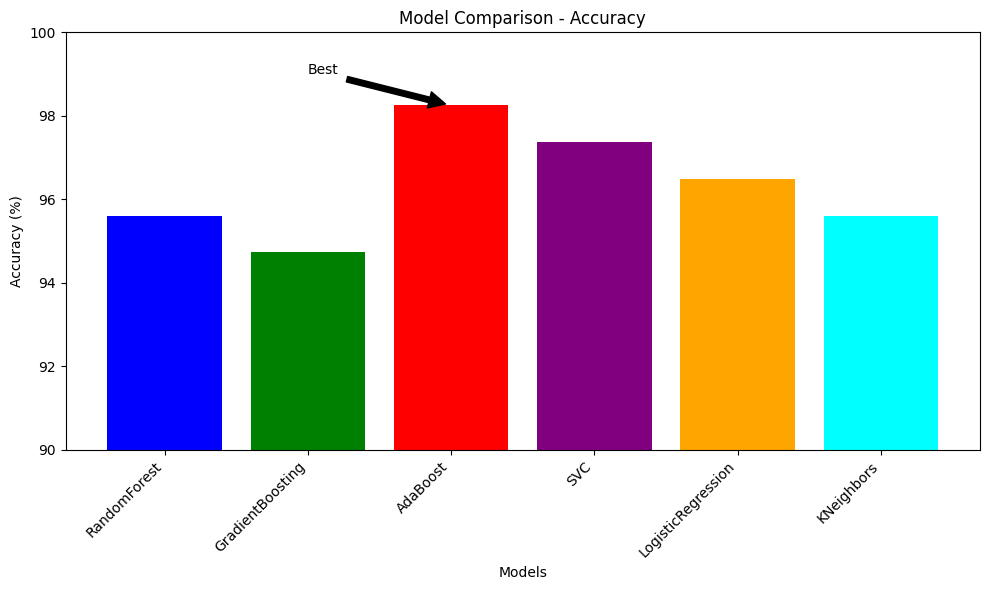

In [16]:


import matplotlib.pyplot as plt
# Sample data (replace with your actual results)
models = ['RandomForest', 'GradientBoosting', 'AdaBoost', 'SVC', 'LogisticRegression', 'KNeighbors']
accuracies = [95.61, 94.74, 98.25, 97.37, 96.49, 95.61]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison - Accuracy')
plt.ylim([90, 100])  # Set y-axis limits for better visualization
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Highlight AdaBoost as the best
plt.annotate('Best', xy=('AdaBoost', 98.25), xytext=(1, 99),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.show()


# **Conclusion**
This script covers the entire workflow from data loading to model evaluation and comparison. You can further refine the evaluation by using cross-validation or other techniques, but this script should give you a comprehensive start for your analysis.